# Introduction

# Packages

In [2]:
import music21
import numpy as np
import pandas as pd
import os
import zipfile

from collections import Counter

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, random_split, DataLoader

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Data

## Zipfile

In [3]:
# define zip file
zip_file = 'music_classic.zip'

# extract all from zip
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()


## Extract Data From Midi to Dataframe

In [ ]:
# def function to get the notes as text from midi files
def extract_notes(midi):
    notes = []
    pick = None
    songs = music21.instrument.partitionByInstrument(midi)
    for part in songs.parts:
        pick = part.recurse()
        for element in pick:
            if isinstance(element, music21.note.Note):
                notes.append(str(element.pitch))
            elif isinstance(element, music21.chord.Chord):
                notes.append(".".join(str(n) for n in element.normalOrder))
    return ' - '.join(notes)


# store mdi files in a dictionary with artist as keys
folder_path = 'music_classic'

artist_midi_dict = {}
cnt_artist = 0
cnt_midi = 0
for artist_folder in os.listdir(folder_path):
    print(artist_folder)
    
    filepath = folder_path + '/' + artist_folder+'/'

    midis = []
    for i in os.listdir(filepath):
        if i.endswith('.mid'):
            tr = filepath + i
            try:
                midi = music21.converter.parse(tr)
                midis.append(extract_notes(midi))
            except:
                continue
        
        cnt_midi += 1
        if cnt_midi == 5:
            cnt_midi = 0
            break
            
            
    artist_midi_dict[artist_folder] = midis
    
    cnt_artist += 1
    if cnt_artist == 5:
        break



In [9]:

# create a dataframe with artist and notes
df = pd.DataFrame(columns=['artist', 'midi'])
for artist in artist_midi_dict.keys():
    for midi in artist_midi_dict[artist]:
        new_row = {'artist':artist, 'midi':midi}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [10]:
df

,artist,midi
0,beeth,8.1 - F4 - 8.0 - E-4 - 7.10 - C#4 - 3.8 - C4 -...
1,beeth,C4 - G#2 - G#3 - E-3 - G#3 - E-3 - B-3 - C#3 -...
2,beeth,0.3.7 - 0.3.7 - 7.0 - E-3 - 7.11.2 - D3 - 0.3....
3,beeth,C4 - G#4 - 3.8 - 8.10 - 7.8 - C5 - C#4 - 3.7 -...
4,beeth,E4 - F#4 - E4 - G#4 - 4 - B3 - E4 - B3 - 8.11 ...
5,debussy,C2 - C3 - G3 - C4 - D4 - E4 - G3 - C4 - E4 - D...
6,debussy,F2 - D2 - F2 - G2 - C2 - D2 - F2 - D2 - C2 - C...
7,debussy,E5 - F5 - G5 - A5 - E5 - F5 - G5 - A5 - E4 - E...
8,debussy,E4 - 11.4 - E4 - 11.4 - E4 - 11.4 - E4 - 11.4 ...
9,schubert,1.4 - 4.9 - 2.6 - 6.9 - 0.3 - 3.9 - 1.4 - 4.9 ...


## Data Validation

# Training Loop

## One to One

## Many to One

### Data Selection

In [11]:
# get specific artist
artist = 'grieg'

# filter dataframe for artist
data = df[df['artist'] == artist]

# get all notes
notes = ' - '.join(data['midi'].tolist()).split(' - ')

## EDA

In [12]:
# apply counter to get the frequency of each note
counter_notes = Counter(notes)

# sort counter
counter_notes = dict(sorted(counter_notes.items(), key=lambda item: item[1], reverse=True))

# get unique notes
unique_notes = list(counter_notes.keys())

# get frequency of each note
freq_notes = list(counter_notes.values())

# print average, most common and least common note
print('Average note frequency: ', np.mean(freq_notes))
print('Most common note: ', unique_notes[np.argmax(freq_notes)], np.max(freq_notes))
print('Least common note: ', unique_notes[np.argmin(freq_notes)], np.min(freq_notes))

Average note frequency:  25.714285714285715
Most common note:  A4 142
Least common note:  A0 1


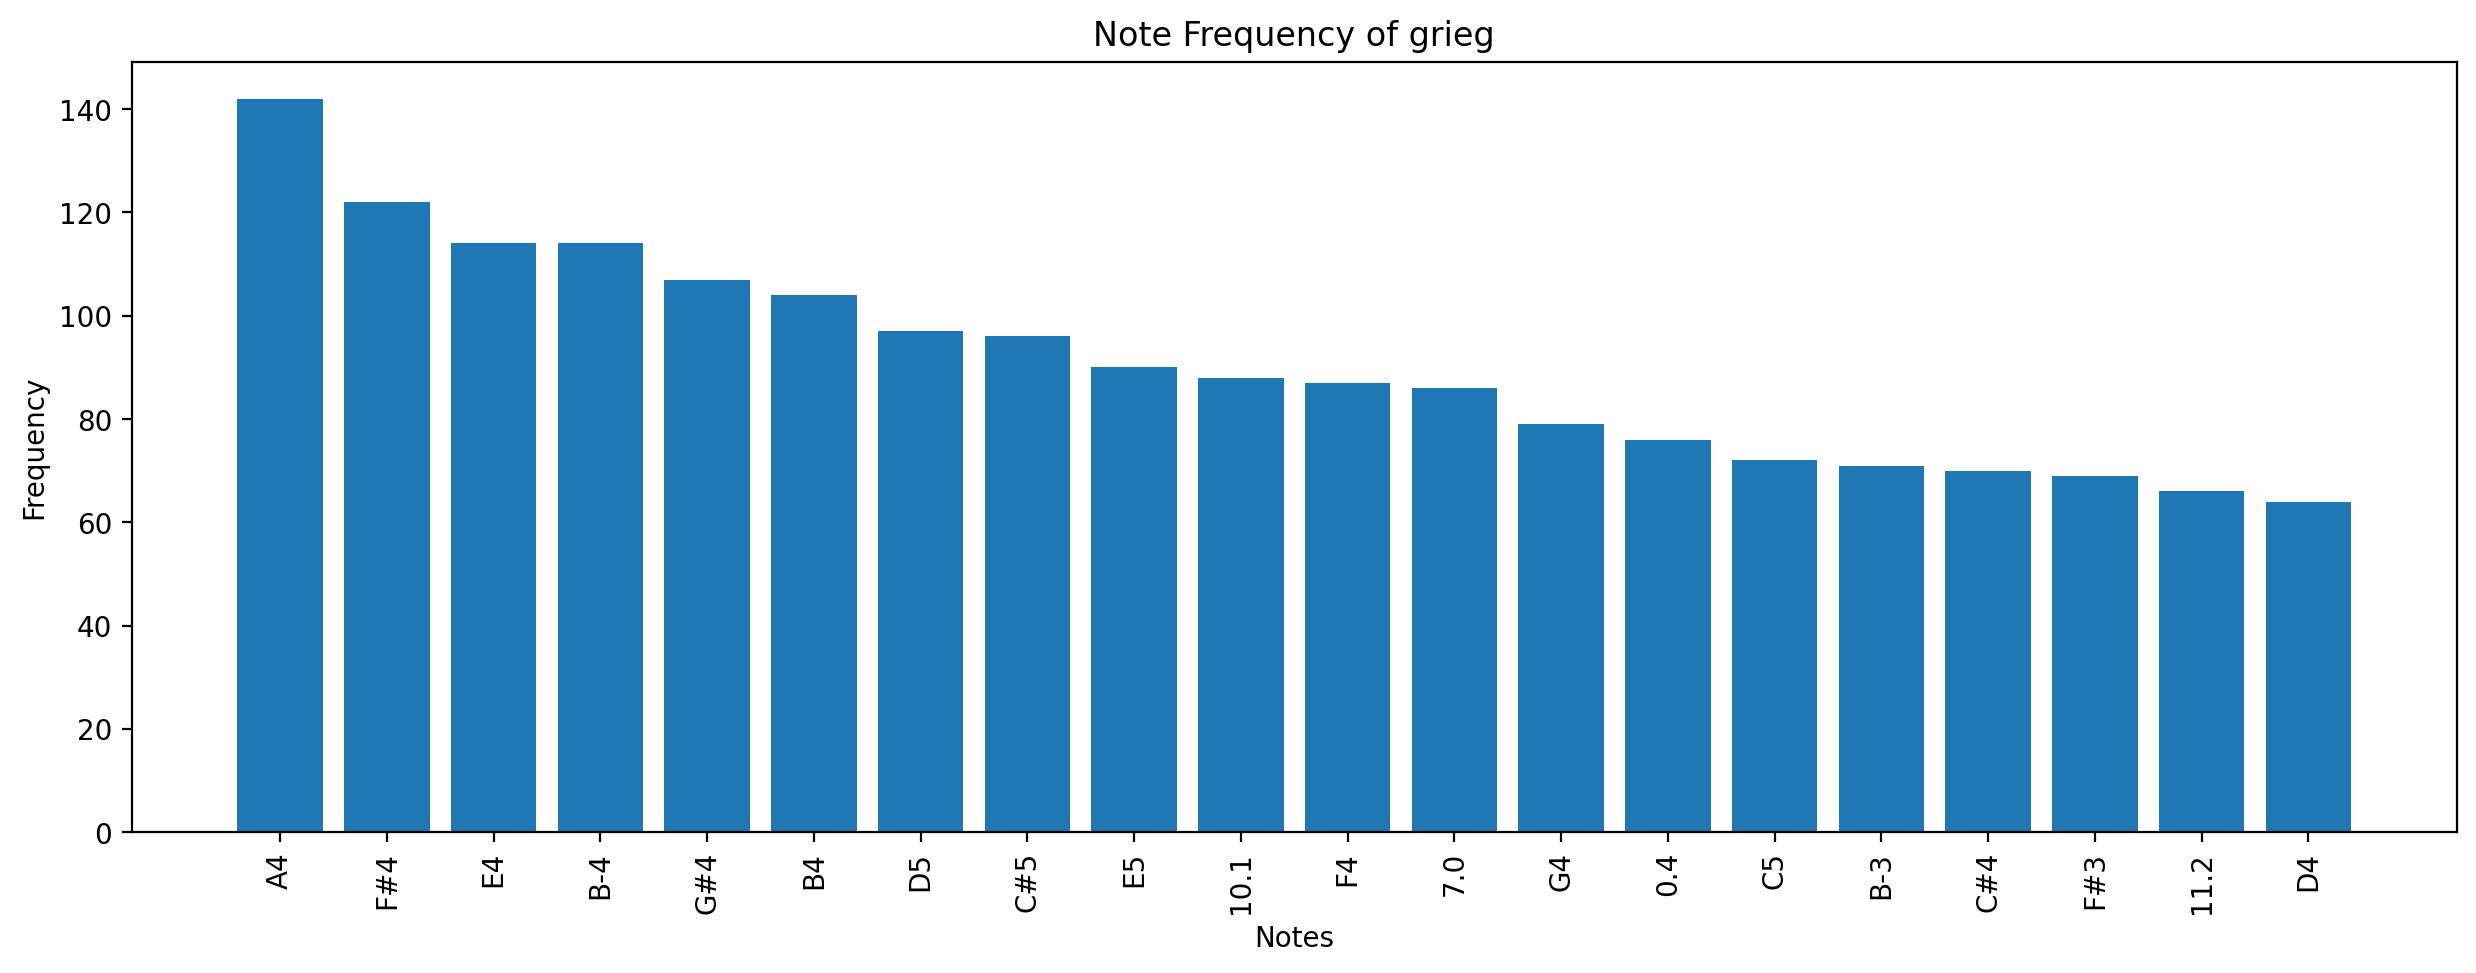

In [13]:
# bar plot of note frequency of 20 most common notes
plt.figure(figsize=(15, 5))
plt.bar(unique_notes[:20], freq_notes[:20])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Notes')
plt.title('Note Frequency of ' + artist)
plt.show()

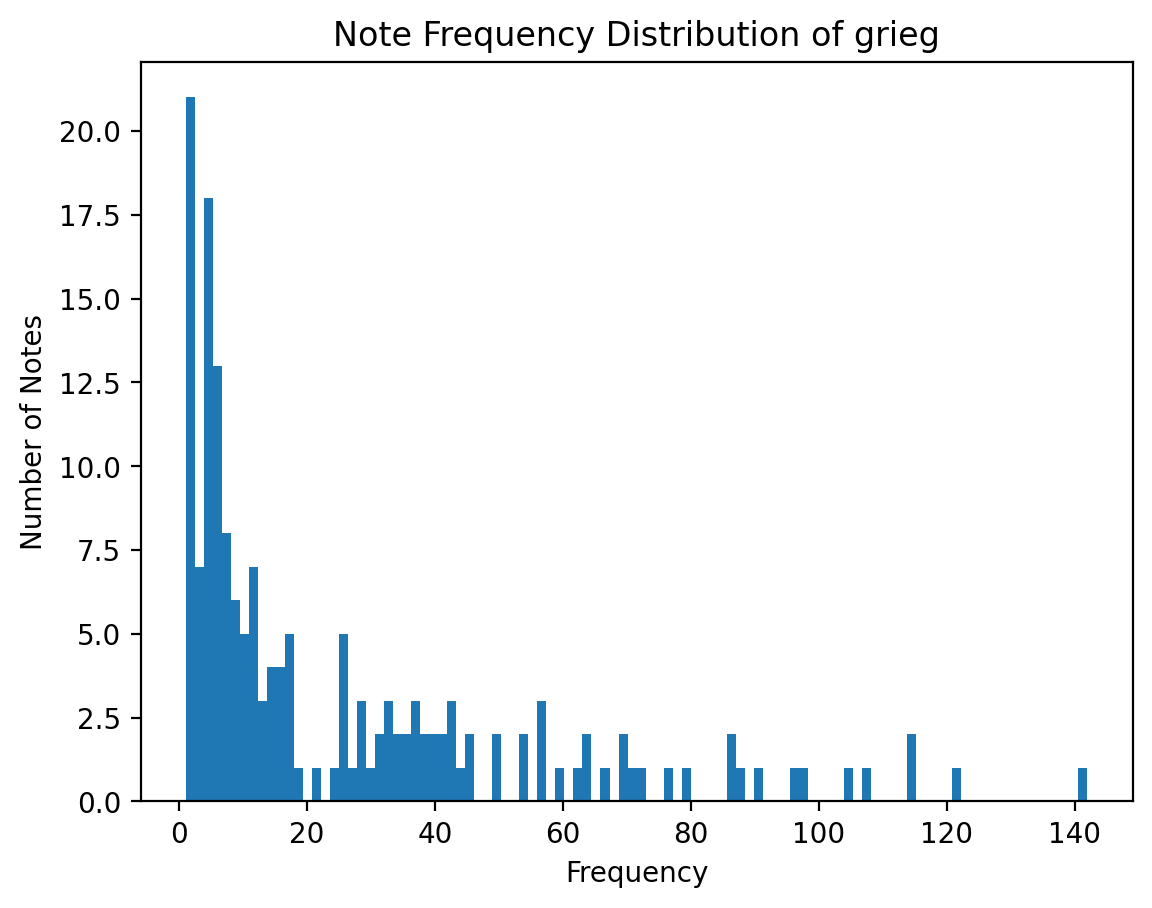

In [14]:
plt.hist(freq_notes, bins=100)
plt.xlabel('Frequency')
plt.ylabel('Number of Notes')
plt.title('Note Frequency Distribution of ' + artist)
plt.show()

## Filtering

In [15]:
#Getting a list of rare chords
rare_note = []
for index, (key, value) in enumerate(counter_notes.items()):
    if value < 100:
        m =  key
        rare_note.append(m)
        
print("Total number of notes that occur less than 100 times:", len(rare_note))


#Eleminating the rare notes
for element in notes:
    if element in rare_note:
        notes.remove(element)

print("Length of Corpus after elemination the rare notes:", len(notes))

Total number of notes that occur less than 100 times: 162
Length of Corpus after elemination the rare notes: 2344


## Data For Training

In [29]:
# Encoding string notes to integers
note_labels = sorted(set(item for item in notes))
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(note_labels)

# Create a dictionary to map notes to integers
note_to_int = dict(zip(note_labels, integer_encoded))

# Prepare input-output pairs
sequence_length = 10 # Length of input sequences
network_input = []
network_output = []

for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = notes[i:i + sequence_length]
    sequence_out = notes[i + sequence_length]
    network_input.append([note_to_int[char] for char in sequence_in])
    network_output.append(note_to_int[sequence_out])

n_patterns = len(network_input)


In [31]:
# Reshape the input into a format compatible with LSTM layers
network_input = np.reshape(network_input, (n_patterns, sequence_length, 1))

# Normalize input
network_input = network_input / float(len(note_labels))

# Convert output to one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
network_output = onehot_encoder.fit_transform(np.array(network_output).reshape(-1, 1))

/home/paperspace/RNN_Training_Loops/RNN_Training_Loops/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
# Split data into training and validation sets
train_size = int(len(network_input) * 0.8)
train_input = network_input[:train_size]
train_output = network_output[:train_size]
val_input = network_input[train_size:]
val_output = network_output[train_size:]

# Create a custom dataset
class MusicDataset(Dataset):
    def __init__(self, input, output):
        self.input = input
        self.output = output

    def __len__(self):
        return len(self.input)

    def __getitem__(self, idx):
        return torch.tensor(self.input[idx]).float(), torch.tensor(self.output[idx])
    

# Create dataloaders
batch_size = 8
train_dataset = MusicDataset(train_input, train_output)
val_dataset = MusicDataset(val_input, val_output)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [33]:
class MusicRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout):
        super(MusicRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.dropout = dropout

        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        # c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Model instantiation
input_size = 1  # As we have normalized input
hidden_size = 256
output_size = len(note_labels)  # Number of unique notes
num_layers = 2
dropout = 0.1

model = MusicRNN(input_size, hidden_size, output_size, num_layers, dropout)


In [34]:
# training parameters
learning_rate = 0.001
num_epochs = 100

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Lists for storing metrics
epoch_losses = []
epoch_accuracies = []

# Train model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    epoch_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for i, (inputs, labels) in enumerate(train_loader):
        model.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Loss accumulation
        epoch_loss += loss.item()

        # Get predictions
        _, predicted = torch.max(outputs.data, 1)

        # Update train correct, total
        total_predictions += labels.size(0)
        correct_predictions += (predicted == torch.max(labels, 1)[1]).sum().item()

    # Average loss and accuracy for the epoch
    avg_epoch_loss = epoch_loss / n_total_steps
    epoch_accuracy = 100 * correct_predictions / total_predictions

    # Append to the lists
    epoch_losses.append(avg_epoch_loss)
    epoch_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%') 

Epoch [1/100], Loss: 4.3411, Accuracy: 5.09%
Epoch [2/100], Loss: 4.1817, Accuracy: 6.00%
Epoch [3/100], Loss: 4.0875, Accuracy: 6.43%
Epoch [4/100], Loss: 4.0683, Accuracy: 6.32%
Epoch [5/100], Loss: 4.0184, Accuracy: 7.61%
Epoch [6/100], Loss: 3.9923, Accuracy: 7.39%
Epoch [7/100], Loss: 3.9417, Accuracy: 6.75%
Epoch [8/100], Loss: 3.8967, Accuracy: 7.77%
Epoch [9/100], Loss: 3.8547, Accuracy: 7.77%
Epoch [10/100], Loss: 3.8161, Accuracy: 9.16%
Epoch [11/100], Loss: 3.7577, Accuracy: 9.64%
Epoch [12/100], Loss: 3.6908, Accuracy: 9.69%
Epoch [13/100], Loss: 3.6059, Accuracy: 11.73%
Epoch [14/100], Loss: 3.5463, Accuracy: 11.68%
Epoch [15/100], Loss: 3.4514, Accuracy: 14.03%
Epoch [16/100], Loss: 3.3290, Accuracy: 15.27%
Epoch [17/100], Loss: 3.2357, Accuracy: 16.55%
Epoch [18/100], Loss: 3.1012, Accuracy: 19.39%
Epoch [19/100], Loss: 2.9600, Accuracy: 21.53%
Epoch [20/100], Loss: 2.8226, Accuracy: 24.48%
Epoch [21/100], Loss: 2.6555, Accuracy: 28.12%
Epoch [22/100], Loss: 2.4862, Accu

KeyboardInterrupt: 

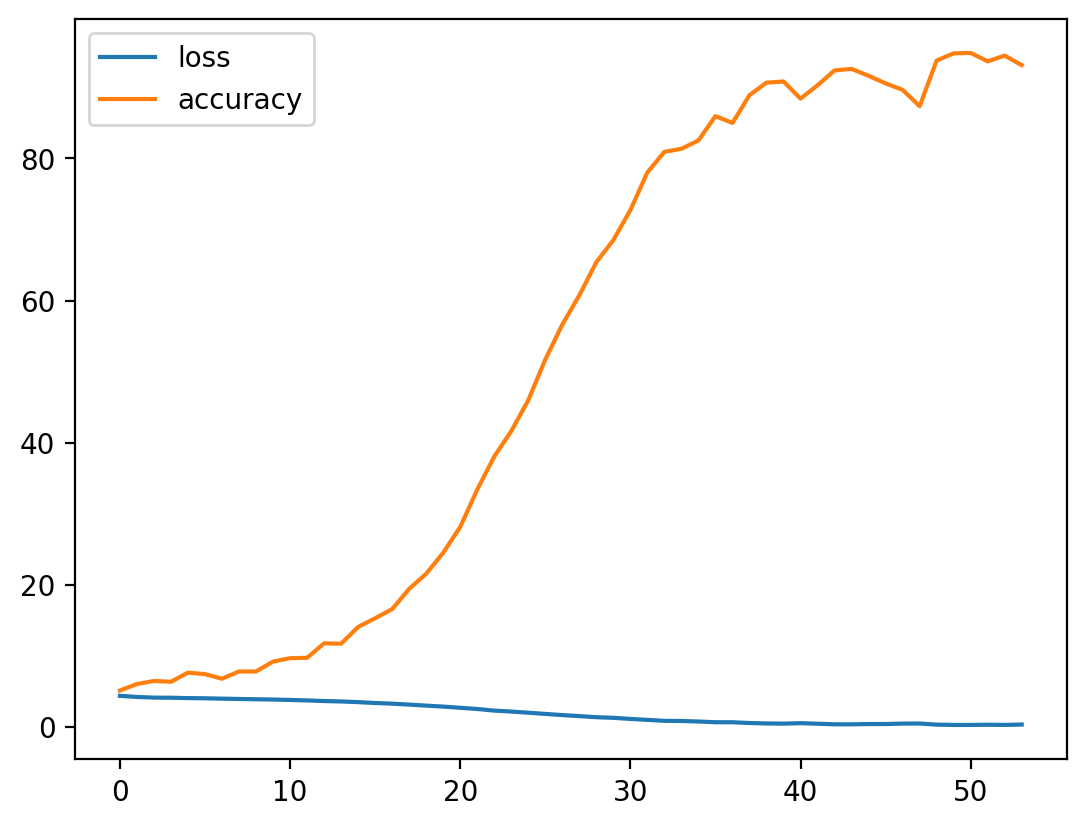

In [35]:
# plot loss and accuracy
plt.plot(epoch_losses, label='loss')
plt.plot(epoch_accuracies, label='accuracy')
plt.legend()
plt.show()

In [15]:
loss, train_loss

(tensor(3.6941, grad_fn=<NllLossBackward0>), 26619.48533630371)